In [1]:
from collections import Counter
import pandas as pd
from operator import methodcaller
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# EDA

In [2]:
train = pd.read_csv('/Users/jbian/Desktop/CU/5291/project/train.csv')
members = pd.read_csv('/Users/jbian/Desktop/CU/5291/project/members.csv')
extra = pd.read_csv('/Users/jbian/Desktop/CU/5291/project/song_extra_info.csv')
songs = pd.read_csv('/Users/jbian/Desktop/CU/5291/project/songs.csv')

## Raw Data
### Overview of Data

In [3]:
print('Head of train data:\n',train.head(20),'\n')
print('Head of members data:\n',members.head(),'\n')
print('Head of songs data:\n',songs.head(),'\n')
print('Head of extra data:\n',extra.head(),'\n')

Head of train data:
                                             msno  \
0   FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1   Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2   Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3   Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4   FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
5   FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
6   Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
7   FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
8   uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
9   uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
10  uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
11  uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
12  TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=   
13  3g0bC24RD7QUeALY1IF/e8L6X3fHG298ZFIsCEG9T9Y=   
14  TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=   
15  3g0bC24RD7QUeALY1IF/e8L6X3fHG298ZFIsCEG9T9Y=   
16  TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=   
17  TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5s

In [4]:
print(train.shape)
print(members.shape)
print(songs.shape)

(7377418, 6)
(34403, 7)
(2296320, 7)


### Unique Values Insight of Members and Songs

In [5]:
def genre_count(data):
    genre = data.genre_ids
    genre_str = list(map(methodcaller('split', '|'), map(str,genre)))

    genre_uni = []
    for i in range(data.shape[0]):
        for j in range(len(genre_str[i])):
            if genre_str[i][j] not in genre_uni :
                genre_uni.append(genre_str[i][j])
    return genre_uni

genre_uni = genre_count(songs)

In [6]:
print('Unique values of all member ages are:\n',members.bd.unique())
print('Unique values of all member cities are:\n',members.city.unique())
print('Unique values of all song genres are:\n',genre_uni)
print('Unique values of all song languages are:\n',songs.language.unique())
# print('Unique values of all song artists are:\n',genre_uni)

print('Number of unique member ages is:', len(members.bd.unique()))
print('Number of unique member cities is:',len(members.city.unique()))
print('Number of unique song genres is:',len(genre_uni))
print('Number of unique song genres is:',len(songs.language.unique()))
# print('Number of unique artist of all songs is:',artist_uni)

Unique values of all member ages are:
 [   0   43   28   33   20   30   29   26   25   21   22   16   23   37
   18   19   51   24   17   45   36   57   27   34   32   15   48   50
   54   47   35   46   31   14   41   59    2   40   38   55   39   73
   49   44  103   52   70   42   65   56  101   58   53   64   63   76
   66   97    3   72   67   62   61  105   60   13   90   12   68  131
   74   89  931  -38  144   85  112   96   11  102   83 1051   87    7
   95  -43  111   93    5   78 1030  106  107   82   10]
Unique values of all member cities are:
 [ 1 13 12 15  5  6  4 11 18 22 14  8 20  3 17 10 16  9 21  7 19]
Unique values of all song genres are:
 ['465', '444', '726', '864', '857', '850', '843', '458', '352', '1995', '2157', '359', '1609', '139', 'nan', '873', '1955', '1011', '2022', '2122', '786', '947', '242', '1259', '921', '2107', '958', '880', '481', '125', '109', '798', '451', '1152', '940', '1082', '545', '437', '829', '430', '1969', '388', '94', '1572', '275', '409'

### Check about Null Values

In [7]:
# check about the null values in all datasets

print(train.isna().sum())
print(members.isna().sum())
print(songs.isna().sum())
print(extra.isna().sum())

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64
msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64
song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64
song_id         0
name            2
isrc       136548
dtype: int64


## Train Data
### Overview of Train Data

In [8]:
print('There are', train['msno'].nunique(), 'users in train data.')
print('There are', train['song_id'].nunique(), 'songs in train data.')

There are 30755 users in train data.
There are 359966 songs in train data.


In [9]:
train_mer = train.merge(songs[['song_id', 'artist_name', 'genre_ids','language','song_length']], 
                           on='song_id')
train_merged = train_mer.merge(members[['msno','bd', 'city', 'gender','registered_via',
                                          'registration_init_time','expiration_date']], 
                           on='msno')
print(train_merged.head())

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
3  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
2  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=           explore   
3  bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=           explore   
4  EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=           explore   

  source_screen_name      source_type  target   artist_name genre_ids  \
0            Explore  online-playlist       1      Bastille       359   
1            Explore  online-playlist       1   Brett Young      1011   
2            Explore  online-playlist       1     Desiigner

In [10]:
print('There are',train_merged.song_id.nunique(),'songs in train data.')
print('There are',train_merged.artist_name.nunique(),'artists of songs in train data.')
print('There are',train_merged.language.nunique(),'languages of songs in train data.')
print('There are',len(genre_count(train_merged)),'genres of songs in train data.')
print('There are',train_merged.city.nunique(),'cities of people in train data.')

There are 359914 songs in train data.
There are 40582 artists of songs in train data.
There are 10 languages of songs in train data.
There are 167 genres of songs in train data.
There are 21 cities of people in train data.


### Delete Rows with NaN Values in Genre

In [11]:
train_merged = train_merged.dropna(subset=['genre_ids'])
print('Now, there are',len(genre_count(train_merged)),'genres of songs in train data.')

Now, there are 166 genres of songs in train data.


### Distributions of Song Lengths

In [12]:
# Group the data by song
song_length = train_merged[['song_id','song_length']].groupby(['song_id']).agg(['mean'])

#rename columns
song_length.reset_index(inplace=True)
song_length.columns = list(map(''.join, song_length.columns.values))
song_length.columns = ['song_id', 'song_length']

/Users/jbian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of songs length')

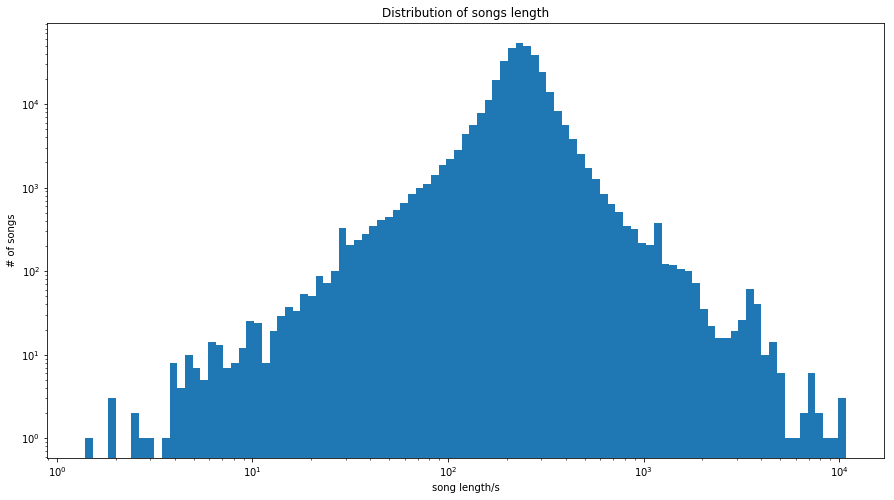

In [13]:
min_song_length = song_length['song_length'].min() / 1000 
max_song_length = song_length['song_length'].max() / 1000

plt.figure(figsize=(15,8))
length_bins = np.logspace(np.log10(min_song_length),np.log10(max_song_length+1),100)
sns.distplot(song_length['song_length']/1000, bins=length_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('song length/s')
plt.ylabel('# of songs')
plt.xscale('log')
plt.yscale('log')
plt.title('Distribution of songs length')

### Analysis of Artists of Songs

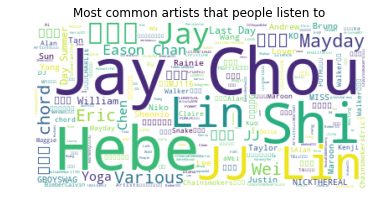

In [14]:
repeats=train[train.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']
song_repeats=pd.DataFrame(song_repeats).merge(songs,left_on='song_id',right_on='song_id')
import matplotlib.pyplot as plt    
from wordcloud import WordCloud

def displaywc(txt,title):
    txt=""
    for i in g:
        txt+=str(i)
    wordcloud = WordCloud(background_color='white').generate(txt)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

g=song_repeats.sort_values(by='count',ascending=False)[:200].artist_name.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common artists that people listen to ')

### Analysis of Composers

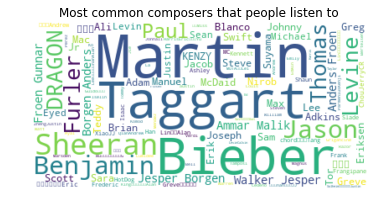

In [15]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].composer.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common composers that people listen to ')

### Analysis of Lyricsists

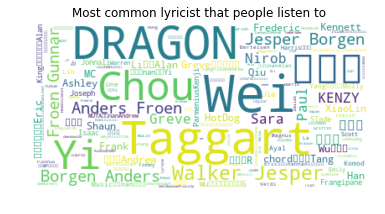

In [16]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].lyricist.tolist()
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common lyricist that people listen to ')

### Distribution of Song Repeat Plays

In [18]:
song_repeat = train_merged[['song_id', 'target']].groupby(['song_id']).agg(['mean','count'])
song_repeat.reset_index(inplace=True)

#rename columns                                                                              
song_repeat.columns = list(map(''.join, song_repeat.columns.values))
song_repeat.columns = ['song_id', 'repeat_play_chance', 'repeat_plays']  


/Users/jbian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of numbers that songs repeat plays')

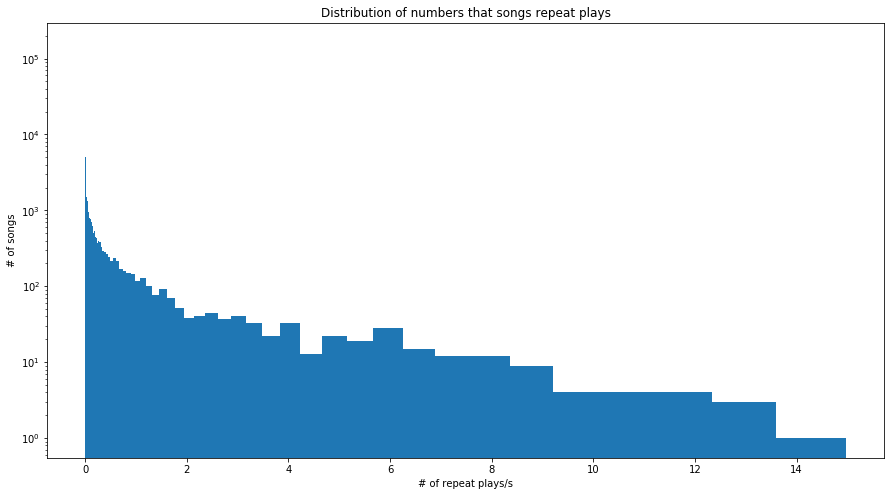

In [19]:
min_song_repeat = song_repeat['repeat_plays'].min() / 1000 
max_song_repeat = song_repeat['repeat_plays'].max() / 1000

plt.figure(figsize=(15,8))
length_bins = np.logspace(np.log10(min_song_repeat),np.log10(max_song_repeat+1),100)
sns.distplot(song_repeat['repeat_plays']/1000, bins=length_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of repeat plays/s')
plt.ylabel('# of songs')
plt.yscale('log')
plt.title('Distribution of numbers that songs repeat plays')

### Analysis on Number of Songs in Each Genre

In [20]:
genre_str = list(map(methodcaller('split', '|'), map(str,train_merged.genre_ids)))
genre_list = []
for i in range(train_merged.shape[0]):
    for j in range(len(genre_str[i])):
        genre_list.append(genre_str[i][j])

In [21]:
genre_count = Counter(genre_list)
print(genre_count)
x_values = list(genre_count.keys())
y_values = list(genre_count.values())

Counter({'465': 3848078, '458': 1311333, '921': 410660, '1609': 374123, '444': 282554, '1259': 251838, '2022': 166537, '359': 114999, '139': 102186, '2122': 80357, '786': 67423, '451': 63858, '958': 60497, '437': 59310, '1616': 55285, '1011': 40038, '947': 34147, '109': 33270, '125': 28899, '726': 27202, '2157': 27128, '691': 16250, '430': 15792, '1152': 14309, '829': 12033, '798': 10817, '940': 8092, '873': 8035, '850': 7676, '843': 7347, '864': 7330, '857': 6985, '1287': 6141, '1180': 5396, '242': 5364, '1572': 5363, '275': 5234, '481': 4423, '880': 4405, '2107': 4255, '893': 4170, '423': 4052, '388': 4013, '1995': 3781, '352': 3772, '1955': 3043, '2086': 2979, '545': 2656, '374': 2499, '516': 2446, '2130': 2060, '409': 1942, '2058': 1429, '118': 1075, '2093': 1059, '474': 1009, '2072': 969, '2079': 959, '1605': 925, '2189': 753, '367': 741, '900': 712, '698': 680, '1138': 659, '1082': 560, '2032': 539, '2176': 536, '1969': 449, '381': 428, '94': 407, '531': 407, '2213': 400, '509': 

[]

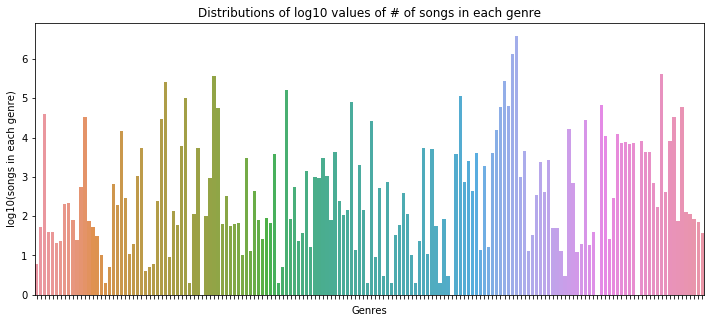

In [22]:
fig = plt.figure(figsize=(12, 5)) 
fig = plt.subplot(1,1,1)
sns.barplot(x=x_values, y=np.log10(y_values))
fig.set_xlabel('Genres')
fig.set_ylabel('log10(songs in each genre)')
fig.set_title('Distributions of log10 values of # of songs in each genre')
fig.set_xticklabels(labels = '')

/Users/jbian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram of log10 values of # of songs in each genre)')

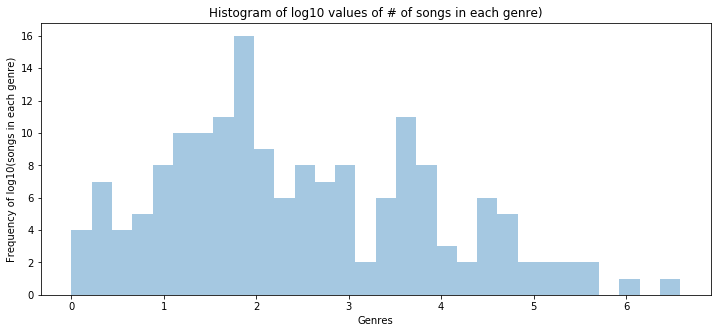

In [23]:
fig = plt.figure(figsize=(12, 5)) 
fig = plt.subplot(1,1,1)
sns.distplot(np.log10(y_values), bins=30, hist=True, kde=False)
fig.set_xlabel('Genres')
fig.set_ylabel('Frequency of log10(songs in each genre)')
fig.set_title('Histogram of log10 values of # of songs in each genre)')

### Analysis on Repeat Plays of Each Genre

In [24]:
repeat_plays_genre_r = train_merged[['genre_ids','target']].groupby(['genre_ids']).agg(['count'])

#rename columns
repeat_plays_genre_r.reset_index(inplace=True)
repeat_plays_genre_r.columns = list(map(''.join, repeat_plays_genre_r.columns.values))
repeat_plays_genre_r.columns = ['genre_ids','repeat_plays']

In [25]:
repeat_count_genre = []
for i in range(len(genre_uni)):
    repeat_count = 0
    for j in range(repeat_plays_genre_r.shape[0]):
        if genre_uni[i] in repeat_plays_genre_r.genre_ids[j]:
            repeat_count += repeat_plays_genre_r.repeat_plays[j]
    repeat_count_genre.append(repeat_count)

/Users/jbian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


[]

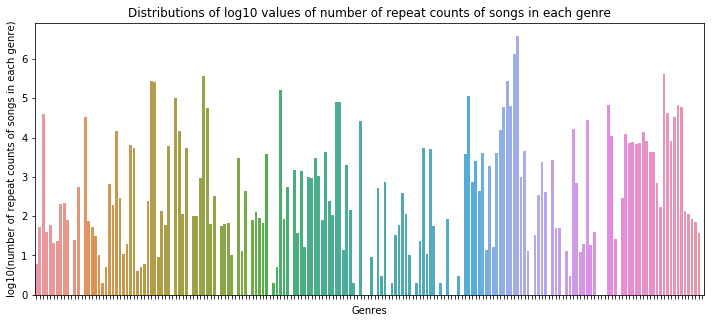

In [26]:
repeat_plays_genre = pd.DataFrame(list(zip(genre_uni,repeat_count_genre)))

fig = plt.figure(figsize=(12, 5)) 
fig = plt.subplot(1,1,1)
sns.barplot(x=genre_uni, y=np.log10(repeat_count_genre))
fig.set_xlabel('Genres')
fig.set_ylabel('log10(number of repeat counts of songs in each genre)')
fig.set_title('Distributions of log10 values of number of repeat counts of songs in each genre')
fig.set_xticklabels(labels = '')

/Users/jbian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


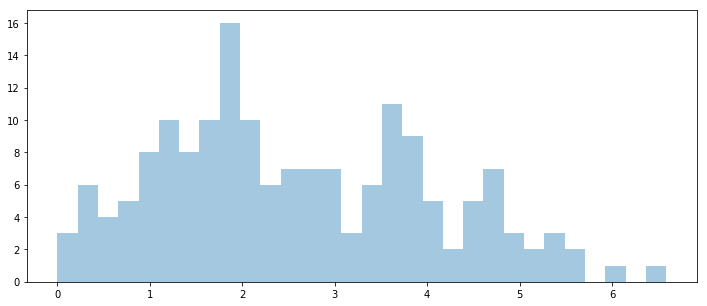

In [27]:
fig = plt.figure(figsize=(12, 5)) 
fig = plt.subplot(1,1,1)
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]
x = remove_values_from_list(repeat_count_genre, 0)
sns.distplot(np.log10(x), hist=True, kde=False, bins=30)